## HW#2: Visualizing Historical Temperature Changes in Singapore

```{admonition} Objectives
:class: tip

This homework will provide you a real-world example in terms of:
* how to visualize time series of temperature anomalies and the trend, and
* how to make beautiful, accessible, and understandable data visualizations.

Happy coding!
```

```{admonition} Submission Guide

Deadline: **Sunday 11:59 pm, 14th November 2021** 
(Note: Late submissions will not be accepted). 

Please upload your solutions to LumiNUS in a Jupyter Notebook format with the name "Homework2_StudentID.ipynb". Make sure to write down your student ID and full name in the cell below. 

For any questions, feel free to contact Prof. Xiaogang HE ([hexg@nus.edu.sg](mailto:hexg@nus.edu.sg)), Huimin WANG ([wanghuimin@u.nus.edu](mailto:wanghuimin@u.nus.edu)) or Zhanwei LIU ([liuzhanwei@u.nus.edu](mailto:liuzhanwei@u.nus.edu)).

```

In [1]:
### Fill your student ID and full name below.

# Student ID:
# Full name:

**Data**:
You will need to use the historical (1982-2020) daily mean air temperature data measured at Singapore's Changi station for this homework. 
You can create a DataFrame using Pandas by reading the file "../../assets/data/Changi_daily_temperature.csv".

### Q1: Visualize the time series of historical temperature anomalies of Singapore

- Calculate the annual mean temperature from the daily data. This will result in a data set of 39 values — one per year. (10 marks)
- Calculate the annual temperature anomalies using the first 10-year period as the baseline. To do this, you need to (1) calculate the decadal mean temperature over the first 10 years (1982—1991) and (2) subtract the decadal mean for each year. (15 marks)
- Make a line graph of these annual temperature anomalies and make sure that you have included necessary non-data elements, such as title, x/y axis labels, legend, etc (you can check the `Matplotlib` [tutorial](https://xiaoganghe.github.io/python-climate-visuals/chapters/data-visuals/matplotlib-basic.html#line-plots) for details). (15 marks)

In [2]:
# Your solutions go here.
# Use the + icon in the toolbar to add a cell.

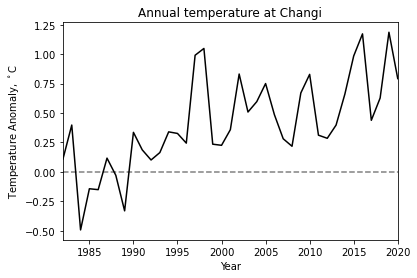

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

daytem = pd.read_csv('../../assets/data/Changi_daily_temperature.csv', 
                 index_col=0, header=0, parse_dates=True)
yrtem = daytem.resample('Y').mean()
yrtem.index = yrtem.index.year
yrtem.index.name = "Year"
yrtem.columns = ["Yearly Mean Temperature"]

tembase = np.mean(yrtem.loc[1982: 1991])
temanom = yrtem - tembase
fig, ax = plt.subplots()
ax.plot(temanom.index, temanom, linestyle ='solid', color='k')
ax.plot(temanom.index, np.zeros(temanom.index.shape), '--k', alpha=0.5)
ax.set_xlim(np.min(temanom.index), np.max(temanom.index))
ax.set_xlabel("Year")
ax.set_ylabel("Temperature Anomaly, $^\circ$C")
ax.set_title("Annual temperature at Changi")
plt.show()

### Q2: Visualize the trend of temperature anomaly

Based on the annual temperature anomalies in Q1, visualize the trend using a 5-year moving window. (20 marks)

In [4]:
# Your solutions go here.
# Use the + icon in the toolbar to add a cell.

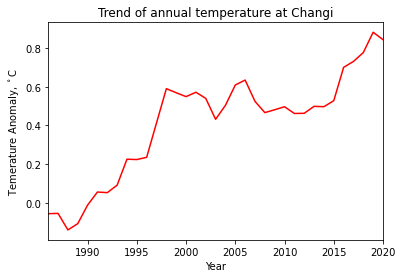

In [5]:
temanom5 = temanom.rolling(5).mean()
temanom5 = temanom5.dropna()

fig, ax = plt.subplots()
ax.plot(temanom5.index, temanom5, linestyle='solid', color='r')
ax.set_xlim(np.min(temanom5.index), np.max(temanom5.index))
ax.set_xlabel("Year")
ax.set_ylabel("Temerature Anomaly, $^\circ$C")
ax.set_title("Trend of annual temperature at Changi")
plt.show()

### Q3: Add climate stripes for Singapore

- Reproduce the [climate stripes](https://showyourstripes.info/s/asia/singapore) for Singapore using `Matplotlib`. (20 marks)
- Use your generated climate stripes as the background and then overlay the time series of annual anomalies (from Q1) and the trend (from Q2) on top of the climate stripes. (20 marks)

Tips: (1) You can refer to [this GitHub repository](https://github.com/josephshea/ClimateStripes/blob/master/ClimateStripes-Canada.ipynb) to make the climate stripes. (2) To make a pretty and accessible (colorblind safe) chart, you might want to fine tune the aesthetics (e.g., color palette of the diverging colorbar) of your chart. 

In [6]:
# Your solutions go here.
# Use the + icon in the toolbar to add a cell.

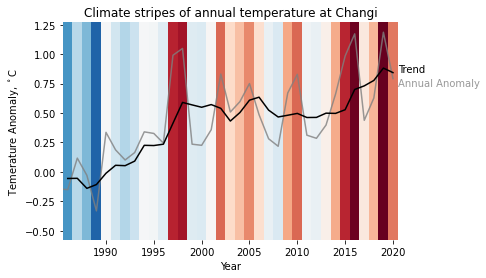

In [7]:
# set figure properties
fig, ax = plt.subplots(frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# plot annual climate stripes
mplnor = mpl.colors.Normalize(vmin=np.nanmin(temanom),
                              vmax=np.nanmax(temanom))
for i in range(temanom.size):
    plt.axvline(temanom.index[i],
                color=plt.cm.RdBu_r(mplnor(temanom.iloc[i, 0])),
                linewidth=10)  # Linewidth should be manually set

# plot line graph
ax.plot(temanom.index, temanom, linestyle='solid', color=[0.5, 0.5, 0.5], alpha=0.8)
ax.annotate('Annual Anomaly', (temanom.index[-1] + 0.5, temanom.iloc[-1, 0]),
            color=[0.5, 0.5, 0.5], alpha=0.8, verticalalignment='top')
ax.plot(temanom5.index, temanom5, linestyle='solid', color='k')
ax.annotate("Trend", (temanom5.index[-1] + 0.5, temanom5.iloc[-1, 0]), color='k')
ax.set_xlim(np.min(temanom5.index) - 0.5, np.max(temanom5.index) + 0.5)
ax.set_xlabel("Year")
ax.set_ylabel("Temerature Anomaly, $^\circ$C")
ax.set_title("Climate stripes of annual temperature at Changi")

plt.show()